### Required installs

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install statsmodels
!pip install yfinance
!pip install mlxtend
!pip install openpyxl


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\Tim\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\Tim\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\Tim\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\Tim\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\Tim\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\Tim\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\Tim\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\Tim\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\Tim\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Code Question 2: Market Basket Analysis using FP-Growth Algorithm

### Overview
Analysis of Online Retail dataset using FP-Growth algorithm to discover association rules between products:
- Data preprocessing of Online Retail transactions
- FP-Growth implementation (min_support=0.01)
- Association rules generation (min_confidence=0.5)
- Visualization of results through:
  - Support vs Confidence scatter plot
  - Metric distributions
  - Top 10 rules by lift

The visualizations provide insights into product relationships and purchasing patterns.

{"POPPY'S PLAYHOUSE BEDROOM "} -> {"POPPY'S PLAYHOUSE KITCHEN"}, Support=0.02, Lift=34.17, Confidence=0.74
{"POPPY'S PLAYHOUSE KITCHEN"} -> {"POPPY'S PLAYHOUSE BEDROOM "}, Support=0.02, Lift=34.17, Confidence=0.72
{'SET OF 3 CAKE TINS PANTRY DESIGN ', 'JAM MAKING SET WITH JARS'} -> {'JAM MAKING SET PRINTED'}, Support=0.01, Lift=9.39, Confidence=0.54
{'SET OF 3 CAKE TINS PANTRY DESIGN ', 'JAM MAKING SET PRINTED'} -> {'JAM MAKING SET WITH JARS'}, Support=0.01, Lift=10.55, Confidence=0.59
{'ALARM CLOCK BAKELIKE RED '} -> {'ALARM CLOCK BAKELIKE GREEN'}, Support=0.03, Lift=12.51, Confidence=0.61
{'ALARM CLOCK BAKELIKE GREEN'} -> {'ALARM CLOCK BAKELIKE RED '}, Support=0.03, Lift=12.51, Confidence=0.65
{'ALARM CLOCK BAKELIKE PINK'} -> {'ALARM CLOCK BAKELIKE RED '}, Support=0.02, Lift=11.50, Confidence=0.60
{'ALARM CLOCK BAKELIKE PINK'} -> {'ALARM CLOCK BAKELIKE GREEN'}, Support=0.02, Lift=10.97, Confidence=0.53
{'ALARM CLOCK BAKELIKE RED ', 'ALARM CLOCK BAKELIKE PINK'} -> {'ALARM CLOCK BAKELI

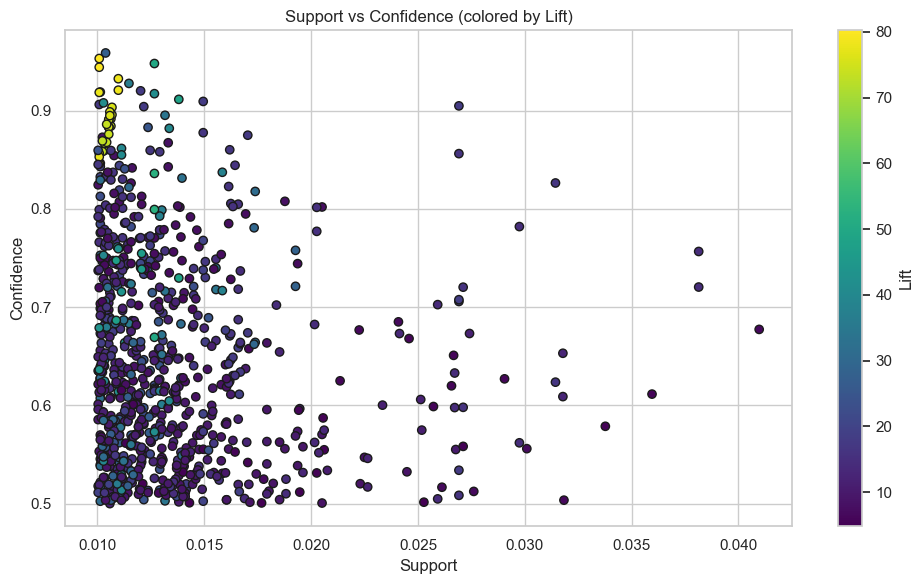

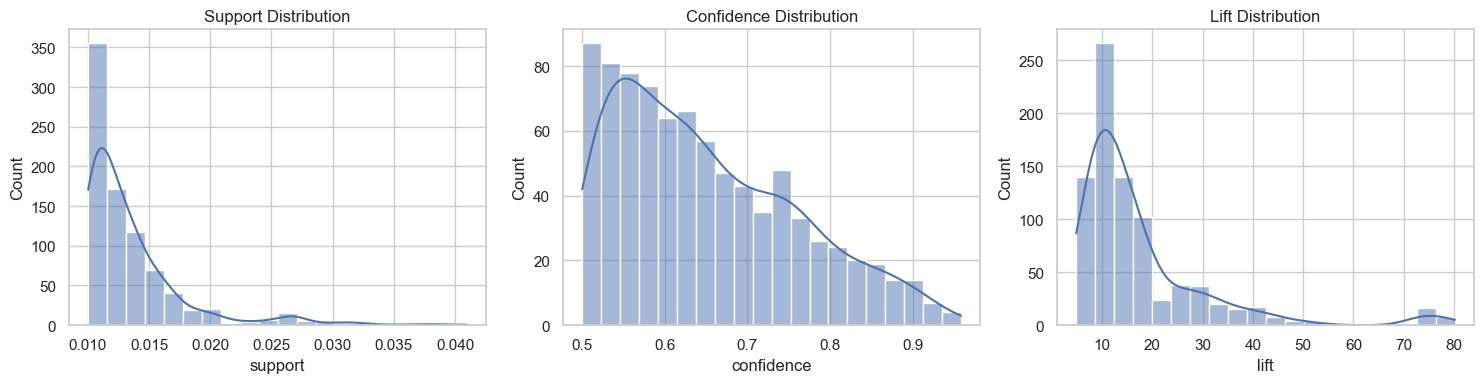

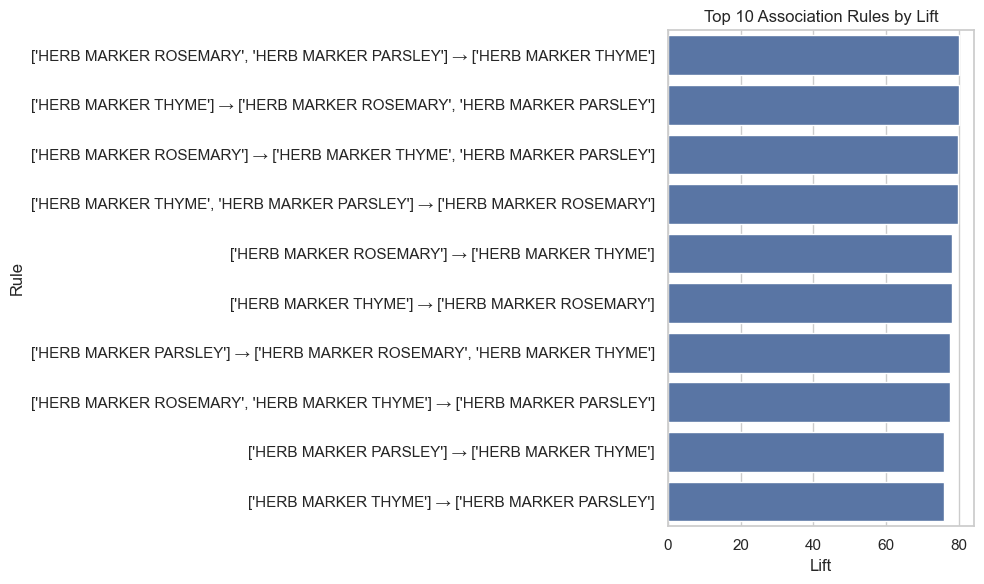

In [1]:
# Q2: Generate association rules using FP-Growth algorithm on Online Retail dataset
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Online Retail Excel file
df = pd.read_excel('Online_Retail.xlsx')
df = df[df['InvoiceNo'].notnull() & df['Description'].notnull()]
df = df[df['Quantity'] > 0]

# Group products by transaction (InvoiceNo)
basket = df.groupby(['InvoiceNo'])['Description'].apply(list).reset_index(name='Items')

# One-hot encode the transaction data
te = TransactionEncoder()
te_ary = te.fit(basket['Items']).transform(basket['Items'])
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply FP-Growth algorithm with minimum support of 0.01
frequent_itemsets = fpgrowth(df_encoded, min_support=0.01, use_colnames=True)

# Generate association rules with minimum confidence of 0.5
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display all rules with antecedents, consequents, support, lift, and confidence
for _, row in rules.iterrows():
    print(f"{set(row['antecedents'])} -> {set(row['consequents'])}, "
          f"Support={row['support']:.2f}, Lift={row['lift']:.2f}, Confidence={row['confidence']:.2f}")



# Set a consistent style
sns.set(style="whitegrid")

# 1. Support vs Confidence Scatter Plot (colored by Lift)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap='viridis', edgecolors='k')
plt.colorbar(scatter, label='Lift')
plt.title('Support vs Confidence (colored by Lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.tight_layout()
plt.show()

# 2. Histograms of Support, Confidence, and Lift
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.histplot(rules['support'], bins=20, kde=True)
plt.title('Support Distribution')

plt.subplot(1, 3, 2)
sns.histplot(rules['confidence'], bins=20, kde=True)
plt.title('Confidence Distribution')

plt.subplot(1, 3, 3)
sns.histplot(rules['lift'], bins=20, kde=True)
plt.title('Lift Distribution')

plt.tight_layout()
plt.show()

# 3. Top 10 Rules by Lift (Bar Plot)
top_lift = rules.sort_values(by='lift', ascending=False).head(10)
labels = [f"{list(a)} → {list(c)}" for a, c in zip(top_lift['antecedents'], top_lift['consequents'])]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_lift['lift'], y=labels)
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Rule')
plt.tight_layout()
plt.show()
